# Задание для итоговой работы

**Анализ данных о покупках** 

Нужно выполнить предварительную обработку данных, сделать разведочный анализ данных EDA, затем проверить гипотезу о данных, выполнить кластеризацию по товарам, определить важные признаки, построить рекомендательную систему. Метод для составления рекомендаций выбрать самостоятельно.

Файл с датасетом - dataset.csv

Датасет - информация о покупках клиентов:

**Дата** - время покупки

**Транзакция** - уникальный номер покупки

**Клиент** - уникальный номер клиента

**Товар** - уникальный номер товара

**Количество** - количество купленных товаров

**Сумма** - цена покупки этого товара

### 1. Импорт библиотек

In [6]:
#Ваш код
%matplotlib inline

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np

import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
import matplotlib.pyplot as plt

# from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# увеличим дефолтный размер графиков
from pylab import rcParams

import statistics

rcParams["figure.figsize"] = 10, 6
sns.set_style("whitegrid", {'axes.grid' : True})


### 2. Загрузка данных

In [8]:
#Ваш код
datas= pd.read_csv('dataset.csv', sep = ';')
print(datas.head(10))
print('\n')
print('Инфо : ') 
print(datas.info())


               Дата  Транзакция  Клиент   Товар  Количество    Сумма
0  03.05.2020 21:43         954       1  2874.0         1.0   8150.0
1  20.11.2020 20:46       13796       1  3586.0         1.0   3930.0
2  08.12.2020 16:28       14431       1  4942.0         1.0   2860.0
3  03.05.2020 21:15         951       2  2812.0         1.0   4895.0
4  20.05.2020 16:46        3352       2  5025.0         1.0    840.0
5  19.09.2020 20:26       10240       2  2741.0         1.0   5790.0
6  19.09.2020 20:26       10240       2  2231.0         1.0  27400.0
7  19.09.2020 20:26       10240       2  2634.0         1.0   5095.0
8  19.09.2020 20:26       10240       2  1958.0         1.0   8320.0
9  16.05.2021 14:38       22180       2  1924.0         1.0  13200.0


Инфо : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48303 entries, 0 to 48302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Дата        48303 non-null  object 


### 3. Очистка данных

**Преобразование данных, обработка пропусков, удаление дубликатов**

In [9]:
#Ваш код
print('Пропуски : ') 
print(datas.isnull().sum())
print('Обработка пропусков..')
datas = datas.dropna(axis=0)
print('Проверка : ')
print(datas.isnull().sum())

Пропуски : 
Дата           0
Транзакция     0
Клиент         0
Товар         30
Количество     0
Сумма          0
dtype: int64
Обработка пропусков..
Проверка : 
Дата          0
Транзакция    0
Клиент        0
Товар         0
Количество    0
Сумма         0
dtype: int64


In [10]:
print('Дубликаты : ')
print(datas.duplicated().sum())
print('Удаляем... ')
datas = datas.drop_duplicates()
print('Проверка : ')
print(datas.duplicated().sum())

Дубликаты : 
1127
Удаляем... 
Проверка : 
0


Преобразование данных

In [11]:
for i in datas:
    print(' Уникальность в признаке : ',i)
    print(datas[i].unique())

# datas['Количество'].unique()
print('\n')
print('Размерность : ',datas.shape)
print('Инфо : ')
print(datas.info())

 Уникальность в признаке :  Дата
['03.05.2020 21:43' '20.11.2020 20:46' '08.12.2020 16:28' ...
 '06.07.2021 15:00' '06.07.2021 15:13' '06.07.2021 15:02']
 Уникальность в признаке :  Транзакция
[  954 13796 14431 ... 25398 25399 25412]
 Уникальность в признаке :  Клиент
[    1     2     3 ... 11048 11049 11050]
 Уникальность в признаке :  Товар
[2874. 3586. 4942. ... 3516. 4151. 2334.]
 Уникальность в признаке :  Количество
[1.]
 Уникальность в признаке :  Сумма
[ 8150.    3930.    2860.   ... 17989.98 19989.98 14605.  ]


Размерность :  (47146, 6)
Инфо : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47146 entries, 0 to 48302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Дата        47146 non-null  object 
 1   Транзакция  47146 non-null  int64  
 2   Клиент      47146 non-null  int64  
 3   Товар       47146 non-null  float64
 4   Количество  47146 non-null  float64
 5   Сумма       47146 non-null  float64
dt

In [12]:
# datas['Время'] = datas['Дата'].str.split(' ').apply(lambda x: x[1])
# datas['Дата'] = datas['Дата'].str.split(' ').apply(lambda x: x[0])
# print('Убираем ненужный столбец - "Количество"')
# datas = datas.drop(columns=['Количество'])

print('Преобразование полей данных в нужные форматы..')
datas = datas.astype({'Товар': 'int64', 
                       'Количество' : 'int64',
                       'Дата': 'datetime64[ns]',
                       'Клиент': 'string',
                       'Товар': 'string',
                       'Транзакция': 'string'})
print('Инфо : ')
print(datas.info())

Преобразование полей данных в нужные форматы..
Инфо : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47146 entries, 0 to 48302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Дата        47146 non-null  datetime64[ns]
 1   Транзакция  47146 non-null  string        
 2   Клиент      47146 non-null  string        
 3   Товар       47146 non-null  string        
 4   Количество  47146 non-null  int64         
 5   Сумма       47146 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), string(3)
memory usage: 2.5 MB
None


### 4. EDA 
 
**Описательная статистика, поиск взаимосвязей**

In [ ]:
datas.head(20)

,Дата,Транзакция,Клиент,Товар,Количество,Сумма
0,2020-03-05 21:43:00,954,1,2874.0,1,8150.0
1,2020-11-20 20:46:00,13796,1,3586.0,1,3930.0
2,2020-08-12 16:28:00,14431,1,4942.0,1,2860.0
3,2020-03-05 21:15:00,951,2,2812.0,1,4895.0
4,2020-05-20 16:46:00,3352,2,5025.0,1,840.0
5,2020-09-19 20:26:00,10240,2,2741.0,1,5790.0
6,2020-09-19 20:26:00,10240,2,2231.0,1,27400.0
7,2020-09-19 20:26:00,10240,2,2634.0,1,5095.0
8,2020-09-19 20:26:00,10240,2,1958.0,1,8320.0
9,2021-05-16 14:38:00,22180,2,1924.0,1,13200.0


Подсччитаем значения в столбцах в нашем датафрэйм

In [ ]:

for i in datas:
    print(i)
    print(datas[i].value_counts())
    print('\n')


Дата
2021-07-22 21:53:00    27
2021-05-07 22:54:00    26
2021-10-07 18:48:00    22
2020-12-16 16:03:00    22
2020-04-08 15:30:00    19
                       ..
2021-10-06 15:46:00     1
2020-08-26 20:20:00     1
2020-08-26 20:16:00     1
2020-08-26 20:07:00     1
2020-03-05 21:43:00     1
Name: Дата, Length: 24775, dtype: int64


Транзакция
26086    27
25294    26
25586    22
13237    19
5250     19
         ..
22136     1
646       1
22133     1
22030     1
954       1
Name: Транзакция, Length: 26381, dtype: Int64


Клиент
1572     474
3738     177
3799     165
4997     151
2740     127
        ... 
9077       1
10529      1
10528      1
10527      1
5497       1
Name: Клиент, Length: 10989, dtype: Int64


Товар
4944.0    725
4911.0    580
3487.0    435
434.0     430
2635.0    425
         ... 
2997.0      1
5414.0      1
5175.0      1
902.0       1
2334.0      1
Name: Товар, Length: 5293, dtype: Int64


Количество
1    47146
Name: Количество, dtype: int64


Сумма
9450.0     415
7495

Основные признаки по которым нам будет легче вести описательную статистику, это - Сумма и количество товаров. Дату, мы будем представлять как временной ряд для выявления заивисимости суммы, количества товаров от месяца. Транзакции, товар, и клиент - это как уникальные номера, которые мы не будем использовать в этой статистике. Выведем статистические данные по сумме:

In [13]:
print('Среднеквадратичное отклонение, смещённое: ',datas['Сумма'].std(ddof=0))
print('Среднеквадратичное отклонение : ', datas['Сумма'].std(ddof=1))
print('Медиана : ',datas['Сумма'].median())
print('Среднее : ',datas['Сумма'].mean())
print('Дисперсия : ',datas['Сумма'].var(ddof=1))
print('Мода : ', statistics.mode(datas['Сумма']))  
print('Мультимода : ', statistics.multimode(datas['Сумма']))

Среднеквадратичное отклонение, смещённое:  12701.135191955205
Среднеквадратичное отклонение :  12701.269894127665
Медиана :  6910.0
Среднее :  10455.257644551086
Дисперсия :  161322256.9234738
Мода :  9450.0
Мультимода :  [9450.0]


Построим и посмотрим график зависимости от месяца в варианте без удаления выбросов, 

,Сумма,Количество
Дата,,
2020-01-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
2020-02-29,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
2020-03-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
2020-04-30,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
2020-05-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
2020-06-30,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
2020-07-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
2020-08-31,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"
2020-09-30,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)"


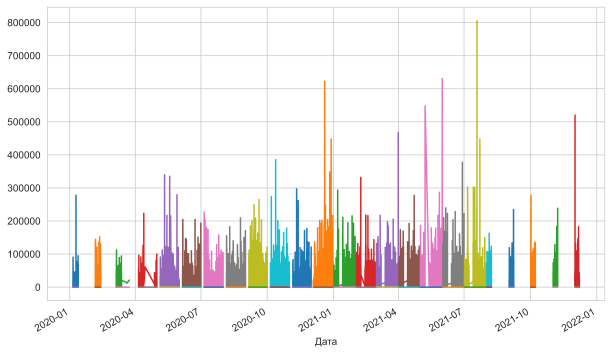

In [14]:
df_month = datas[['Дата','Сумма','Количество','Товар','Транзакция','Клиент']].groupby(['Дата']).sum()
df_month.resample('M').plot()

Построим и посмотрим график распределения плотности Суммы

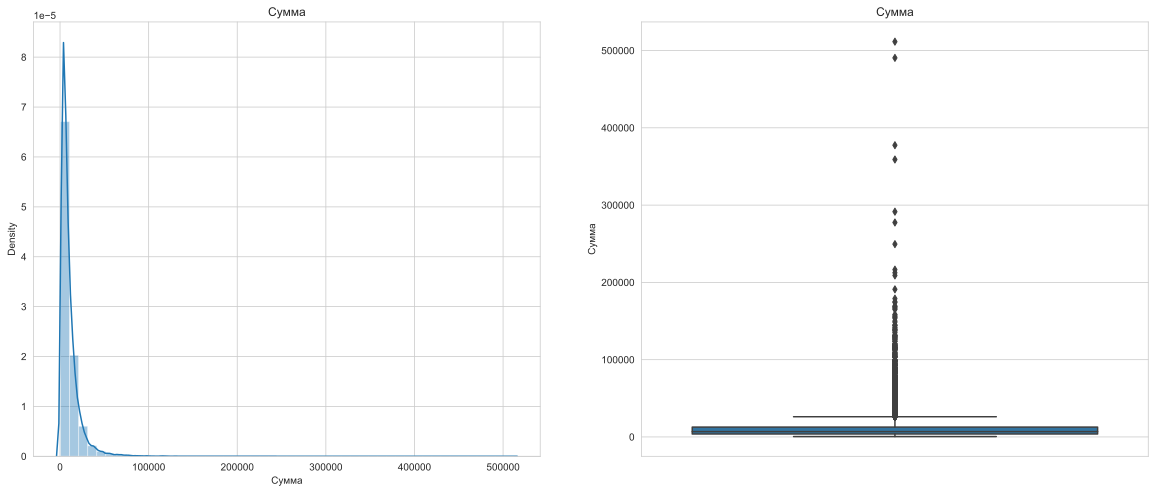

In [ ]:
#Ваш код
#График распределения плотности
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title('Сумма')
sns.distplot(datas.Сумма)

plt.subplot(1,2,2)
plt.title('Сумма')
sns.boxplot(y=datas.Сумма)
plt.show()

На графике видно, что присутствуют выбросы. Уберём их с помощью функции "3 сигм"

In [15]:
def outliers_indicies(feature):
    mid = datas[feature].mean()
    sigma = datas[feature].std()
    return datas[(datas[feature] < mid - 3*sigma) | (datas[feature] > mid + 3*sigma)].index

wrong_sum = outliers_indicies('Сумма')
out = set(wrong_sum)
len(out)
datas.drop(out, inplace=True)

Построим гистограмму частоты продаж от месяца

Text(0.5, 1.0, 'Частота покупок')

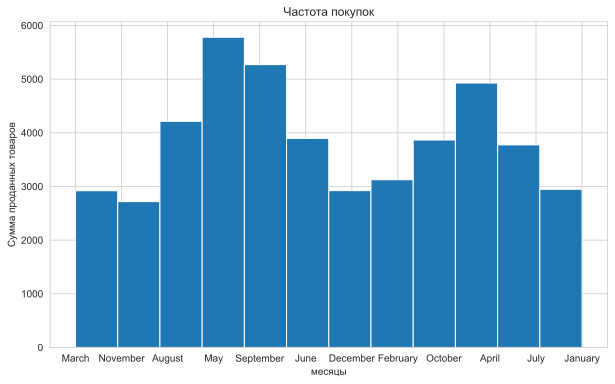

In [16]:
# Частота покупок от месяца
# import datetime as dt

plt.hist(datas['Дата'].dt.month_name(), bins=12)
plt.xlabel('месяцы')
plt.ylabel('Сумма проданных товаров')
plt.title('Частота покупок')


Из гистограммы визуально видим, что больше продаж было на май, сентябрь и апрель. Этот график показывает утверждение первой гипотезы задания. Построим дополнительно столбчатую диаграмму на основе часов по суткам.

Text(0.5, 1.0, 'Частота покупок')

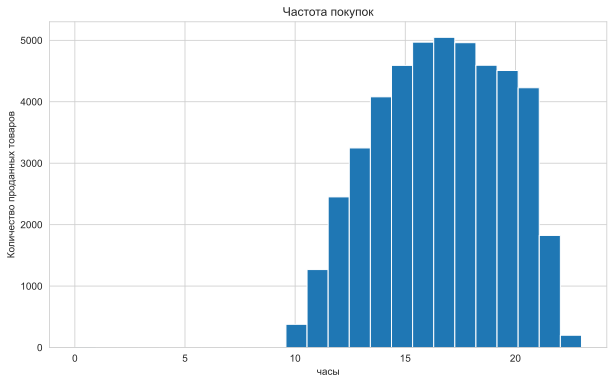

In [17]:
# Стобчатая диаграмма частоты покупок от количество часов
plt.hist(datas['Дата'].dt.hour, bins=24)
plt.xlabel('часы')
plt.ylabel('Количество проданных товаров')
plt.title('Частота покупок')

График в "почти" нормальном распределении. Вывод, смотря на график: "Покупатели чаще берут товары с 15 до 20 часов". Рассмотрим пример, как будет меняться длина датафрэйма продаж в зависимости от часов в сутках: 

In [18]:
datadate = datas.set_index('Дата')

In [19]:
import datetime as dt

list_df = []
i = 0
for i in range(0,23):
    # start_time = datadate[datadate.index.time > dt.time(i,00)]
    # end_time = datadate[datadate.index.time < dt.time(i+1,00)]
    df = datadate.between_time(start_time=dt.time(i,00), end_time = dt.time(i+1), include_start=True, include_end=True)
    print('количество продаж : ', len(df))
    print('время : ', i) 
    print('\n')
    i = + 1

количество продаж :  3
время :  0


количество продаж :  0
время :  1


количество продаж :  0
время :  2


количество продаж :  0
время :  3


количество продаж :  0
время :  4


количество продаж :  0
время :  5


количество продаж :  0
время :  6


количество продаж :  0
время :  7


количество продаж :  0
время :  8


количество продаж :  0
время :  9


количество продаж :  383
время :  10


количество продаж :  1293
время :  11


количество продаж :  2495
время :  12


количество продаж :  3310
время :  13


количество продаж :  4159
время :  14


количество продаж :  4668
время :  15


количество продаж :  5054
время :  16


количество продаж :  5143
время :  17


количество продаж :  5035
время :  18


количество продаж :  4663
время :  19


количество продаж :  4587
время :  20


количество продаж :  4297
время :  21


количество продаж :  1845
время :  22




С 00:00 до 10:00 есть 3 продажи, которые не играют роли для такого масштаба данных, но мы их уберем., скорей всего проходили после закрытия магазина. Также обратим внимание на то, что максимальное количество продаж находится в интервале с 17:00 до 18:00.

In [ ]:
df = datas[datas['Дата'].dt.time < dt.time(10,00)]
print(df)
datas.drop(df.index, inplace=True)

                     Дата Транзакция Клиент   Товар  Количество   Сумма
13235 2020-10-14 00:03:00      12076   2131  1701.0           1  4330.0
13236 2020-10-14 00:03:00      12076   2131  1677.0           1  9450.0
39025 2021-06-04 00:15:00      19694   7602  5084.0           1  8355.0


Так как у нас товары продаются с 10 до 24, поделим день на 2 половины: с 10 до 17(первая половина дня), и с 17 до 24(вторая половина дня), добавим категориальный признак по продаже товаров. Первая половина - 1, вторая - 0.  

In [ ]:
# datas['Дата'].dt.time < dt.time(17,00)

In [20]:
datas['ДеньНочь'] = datas['Дата'].dt.time < dt.time(17,00)
datas['ДеньНочь'].replace({ False : 0, True : 1}, inplace=True)
datas.ДеньНочь.value_counts()

0    25365
1    20991
Name: ДеньНочь, dtype: int64

Добавим дополнительный признак, "День недели", чтобы посмотреть статистику по дням. заменив язык на русский

In [21]:
datas['День недели'] = datas['Дата'].dt.day_name()
datas.head()
datas.replace({'Monday':'Понедельник',
               'Tuesday':'Вторник',
               'Wednesday':'Среда',
               'Thursday':'Четверг',
               'Friday':'Пятница',
               'Saturday':'Суббота',
               'Sunday':'Воскресение'
               },inplace=True)

In [22]:
datas['День недели'].value_counts()

Среда          9333
Четверг        8209
Воскресение    6448
Вторник        6070
Пятница        5517
Понедельник    5492
Суббота        5287
Name: День недели, dtype: int64

Text(0.5, 1.0, 'Частота покупок')

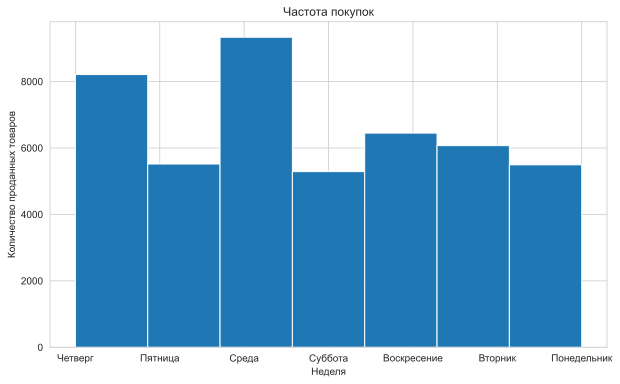

In [23]:
plt.hist(datas['День недели'], bins=7)
plt.xlabel('Неделя')
plt.ylabel('Количество проданных товаров')
plt.title('Частота покупок')

! Из графиков добавлю ещё 2 гипотезы, невходящие в задание, есть зависимость суммы продаж от дня недели, и так же от часов в сутках.

Заменим английский язык на русский по месяцам для удобства

In [25]:
datas['Месяц'] = datas['Дата'].dt.month_name()
datas['Месяц'].replace({
    'January':'Январь',
    'February':'Февраль',
    'March':'Март',
    'April':'Апрель',
    'May':'Май',
    'June':'Июнь',
    'July':'Июль',	
	'August':'Август',	
	'September':'Cентябрь',
    'October':'Октябрь',
    'November':'Ноябрь',
    'December':'Декабрь'	
}, inplace=True)

In [ ]:
datas

,Дата,Транзакция,Клиент,Товар,Количество,Сумма,ДеньНочь,День недели,Месяц
0,2020-03-05 21:43:00,954,1,2874.0,1,8150.0,0,Четверг,Март
1,2020-11-20 20:46:00,13796,1,3586.0,1,3930.0,0,Пятница,Ноябрь
2,2020-08-12 16:28:00,14431,1,4942.0,1,2860.0,1,Среда,Август
3,2020-03-05 21:15:00,951,2,2812.0,1,4895.0,0,Четверг,Март
4,2020-05-20 16:46:00,3352,2,5025.0,1,840.0,1,Среда,Май
...,...,...,...,...,...,...,...,...,...
48298,2021-06-07 15:00:00,25398,11049,1211.0,1,20500.0,1,Понедельник,Июнь
48299,2021-06-07 15:13:00,25399,11049,3034.0,1,21950.0,1,Понедельник,Июнь
48300,2021-06-07 15:02:00,25412,11050,443.0,1,1490.0,1,Понедельник,Июнь
48301,2021-06-07 15:02:00,25412,11050,2789.0,1,9450.0,1,Понедельник,Июнь


По следующему пункту - Выведем товары  максимальной выручкой за все время или популярные товары

In [26]:

df = datas[['Товар','Количество','Сумма']].groupby('Товар').sum().sort_values('Сумма').reset_index()
print('Популярные товары : ')
print(df[-10:])


Популярные товары : 
       Товар  Количество       Сумма
5173  4801.0         166  2206847.39
5174  2430.0          72  2380239.37
5175  5064.0         423  2394352.38
5176  1789.0         143  2509572.85
5177  4803.0         146  2716116.04
5178  5019.0         399  3056367.99
5179  3060.0         110  3113147.90
5180  3487.0         435  4566229.85
5181  4944.0         725  5092324.27
5182  4757.0         274  6267827.91


Для масштабирования решения задачи по кластеризации и корреляции, добавим дополнительные признаки от суммы и количества товаров : 'Процент продаж','Процент количество','Сумма продаж', 'Сумма количество', создав датафрэйм с группировкой по товару:

In [27]:
datas_prod = datas[['Товар', 'Количество','Сумма']].groupby(['Товар']).sum().reset_index()
datas_prod['Сумма']

0        1495.00
1         757.69
2        9900.00
3       13770.00
4        5545.00
          ...   
5178     2455.00
5179    25440.00
5180     1660.00
5181     3399.00
5182    85439.50
Name: Сумма, Length: 5183, dtype: float64

In [28]:
#Создать дополнительные признаки по объему продаж и суммарное количество
# datas_prod = datas[['Товар', 'Количество','Сумма']].groupby(['Товар']).sum().reset_index()

datas_prod['Процент продаж'] = datas_prod['Сумма']/datas_prod['Сумма'].sum()*100
datas_prod['Процент количество'] = datas_prod['Количество']/datas_prod['Количество'].sum()*100
datas_prod = datas_prod.sort_values('Процент продаж', ascending= False)
datas_prod['Сумма продаж'] = datas_prod['Процент продаж'].cumsum()
datas_prod = datas_prod.sort_values('Процент количество', ascending = False)
datas_prod['Сумма количество'] = datas_prod['Процент количество'].cumsum()
datas_prod.head()

,Товар,Количество,Сумма,Процент продаж,Процент количество,Сумма продаж,Сумма количество
4122,4944.0,725,5092324.27,1.173799,1.563983,2.618556,1.563983
4089,4911.0,580,1823693.31,0.420368,1.251186,11.495331,2.815170
2608,3487.0,435,4566229.85,1.052532,0.938390,3.671088,3.753559
3491,434.0,430,1747247.86,0.402747,0.927604,11.898078,4.681163
1716,2635.0,425,1211674.74,0.279295,0.916818,21.151845,5.597981


**Корреляция**

Построим и выведем "тепловую" матрицу корреляции c дополнительными признакаии 

In [29]:
datas_prod['Товар'] = datas_prod['Товар'].astype('float').astype('int64')
datas_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5183 entries, 4122 to 2674
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Товар               5183 non-null   int64  
 1   Количество          5183 non-null   int64  
 2   Сумма               5183 non-null   float64
 3   Процент продаж      5183 non-null   float64
 4   Процент количество  5183 non-null   float64
 5   Сумма продаж        5183 non-null   float64
 6   Сумма количество    5183 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 323.9 KB


In [30]:
corr = datas_prod.corr()
corr_than_75 = corr[corr>=.75]
corr_than_75

,Товар,Количество,Сумма,Процент продаж,Процент количество,Сумма продаж,Сумма количество
Товар,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Количество,NaN,1.000000,0.802011,0.802011,1.000000,NaN,NaN
Сумма,NaN,0.802011,1.000000,1.000000,0.802011,NaN,NaN
Процент продаж,NaN,0.802011,1.000000,1.000000,0.802011,NaN,NaN
Процент количество,NaN,1.000000,0.802011,0.802011,1.000000,NaN,NaN
Сумма продаж,NaN,NaN,NaN,NaN,NaN,1.000000,0.868489
Сумма количество,NaN,NaN,NaN,NaN,NaN,0.868489,1.000000


<AxesSubplot:>

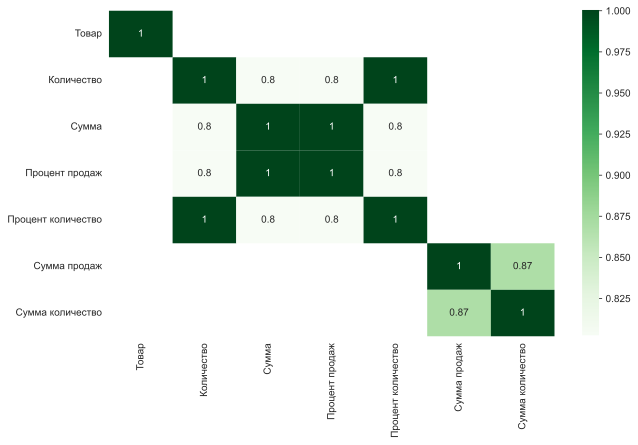

In [31]:
sns.heatmap(corr_than_75, cmap='Greens', annot =True)

Рассчитаем коэффициенты корреляции.

In [32]:
from scipy.stats import spearmanr
from scipy.stats.stats import pearsonr

a = datas_prod['Количество']
b = datas_prod['Сумма']
rho_coef, rho_p = spearmanr(a, b)
r_coef, r_p = pearsonr(a, b)
print('Pearson r %0.3f | Spearman rho %0.3f' 
      % (r_coef, rho_coef))

Pearson r 0.802 | Spearman rho 0.792


Дополнительно проведём расчёт корреляции с датами и с периодами времени, для достоверности 2 гипотез

In [ ]:
datas

,Дата,Транзакция,Клиент,Товар,Количество,Сумма,ДеньНочь,День недели,Месяц
0,2020-03-05 21:43:00,954,1,2874.0,1,8150.0,0,Четверг,Март
1,2020-11-20 20:46:00,13796,1,3586.0,1,3930.0,0,Пятница,Ноябрь
2,2020-08-12 16:28:00,14431,1,4942.0,1,2860.0,1,Среда,Август
3,2020-03-05 21:15:00,951,2,2812.0,1,4895.0,0,Четверг,Март
4,2020-05-20 16:46:00,3352,2,5025.0,1,840.0,1,Среда,Май
...,...,...,...,...,...,...,...,...,...
48298,2021-06-07 15:00:00,25398,11049,1211.0,1,20500.0,1,Понедельник,Июнь
48299,2021-06-07 15:13:00,25399,11049,3034.0,1,21950.0,1,Понедельник,Июнь
48300,2021-06-07 15:02:00,25412,11050,443.0,1,1490.0,1,Понедельник,Июнь
48301,2021-06-07 15:02:00,25412,11050,2789.0,1,9450.0,1,Понедельник,Июнь


In [33]:
datas_date = datas.replace({
    'Январь': 1,
    'Февраль': 2,
    'Март': 3,
    'Апрель' : 4,
    'Май': 5,
    'Июнь': 6,
    'Июль': 7,	
	'Август': 8,	
	'Cентябрь': 9,
    'Октябрь': 10,
    'Ноябрь':11,
    'Декабрь':12,
    'Понедельник': 1,
    'Вторник': 2,
    'Среда':3,
    'Четверг':4,
    'Пятница':5,
    'Суббота':6,
    'Воскресение':7
})

In [34]:
datas_date = datas_date.astype({'Транзакция': 'int64', 'Клиент':'int64', 'Товар':'float'})
datas_date = datas_date.astype({'Товар':'int64'})

In [35]:
datas_date = datas_date.drop(columns=['Количество'])

In [36]:
corr = datas_date.corr()
corr_than_5 = corr[corr>=.5]
corr_than_5

,Транзакция,Клиент,Товар,Сумма,ДеньНочь,День недели,Месяц
Транзакция,1.000000,0.603462,NaN,NaN,NaN,NaN,NaN
Клиент,0.603462,1.000000,NaN,NaN,NaN,NaN,NaN
Товар,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Сумма,NaN,NaN,NaN,1.0,NaN,NaN,NaN
ДеньНочь,NaN,NaN,NaN,NaN,1.0,NaN,NaN
День недели,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Месяц,NaN,NaN,NaN,NaN,NaN,NaN,1.0


<AxesSubplot:>

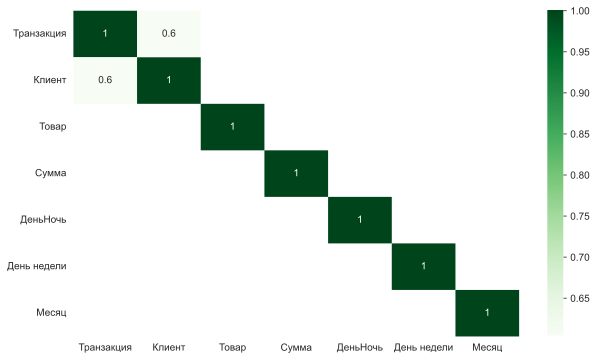

In [37]:
sns.heatmap(corr_than_5, cmap='Greens', annot =True)

In [38]:
from scipy.stats import spearmanr
from scipy.stats.stats import pearsonr

a = datas_date['Клиент']
b = datas_date['Товар']
rho_coef, rho_p = spearmanr(a, b)
r_coef, r_p = pearsonr(a, b)
print('Pearson r %0.3f | Spearman rho %0.3f' 
      % (r_coef, rho_coef))

Pearson r 0.030 | Spearman rho 0.025


Звисимость в "тепловой" таблице корелляции наблюдается только с признаками Клиента и Транзакции, и увы, но не с признаками месяца, дня.ночи, дня недели.('Может и гипотеза не верна') 

### 5.	Выполнить проверку гипотез о данных

5.1 Зависит ли частота покупок от месяца?

Да, зависимость есть и ниже представлены графики.

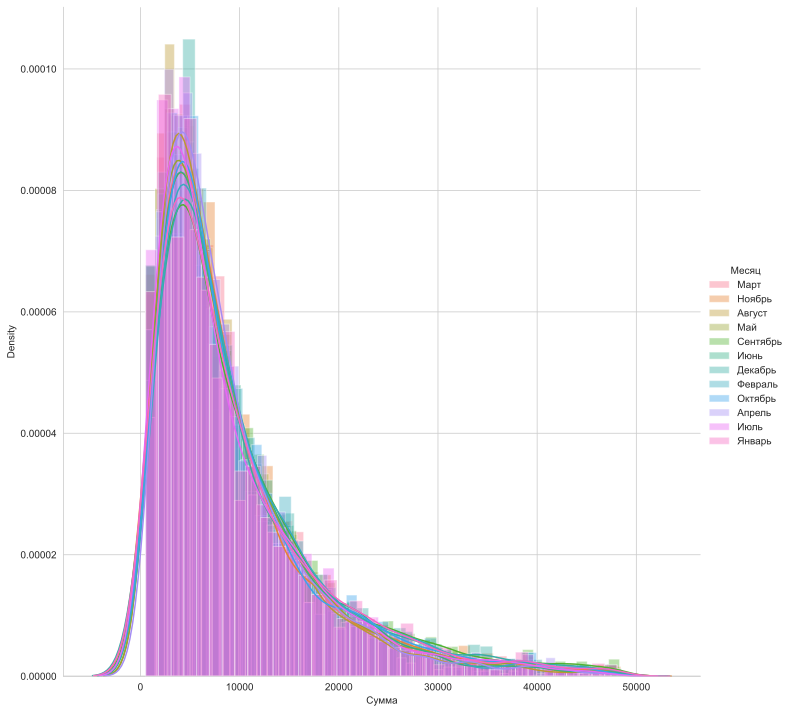

In [39]:
# Ваш код
sns.FacetGrid(datas, hue='Месяц', size =10).map(sns.distplot, 'Сумма').add_legend()
plt.show()

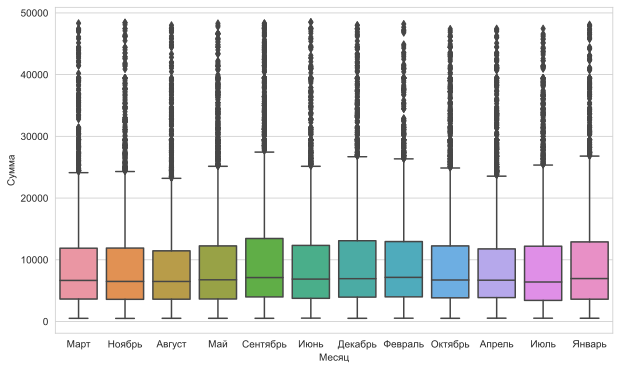

In [ ]:
sns.boxplot(x = 'Месяц', y = 'Сумма', data = datas)
plt.show()

 5.2 Больше лучших клиентов, чем потерянных клиентов?
 
 Т.е. выяснить больше ли клиентов, которые покупали совсем недавно, чаще всего и тратят больше всего, 
 чем клиентов, у которых последняя покупка была давно, и покупали мало и тратили мало.

Для начала выясним, сколько значений по транзакциям и по датам клиентов.

In [40]:
datas.Транзакция.value_counts()

26086    27
25294    25
25586    22
5250     19
13237    19
         ..
19310     1
17299     1
23510     1
16947     1
954       1
Name: Транзакция, Length: 26123, dtype: Int64

In [41]:
datas.Дата.value_counts()

2021-07-22 21:53:00    27
2021-05-07 22:54:00    25
2020-12-16 16:03:00    22
2021-10-07 18:48:00    22
2020-05-11 13:48:00    19
                       ..
2021-04-06 11:48:00     1
2020-10-17 20:02:00     1
2020-09-10 14:38:00     1
2020-09-22 18:44:00     1
2020-03-05 21:43:00     1
Name: Дата, Length: 24544, dtype: int64

Построим датафрэйм из признаков : Клиент, Дата и Транзакция. Проведем поиск дубликатов, т.к на не сколько товаров, может быть одна транзакция, и не сколько дат.

In [42]:
datas[['Клиент','Дата','Транзакция']].duplicated().sum()

20233

Сделаем группировку по клиенту, и посмотрим инофрмацию из датафрэйма по какому-нибудь его идентификатору. 

In [43]:
datas_by_client = datas[['Клиент','Дата','Транзакция']].drop_duplicates().groupby(['Клиент'])

In [44]:
datas_by_client.get_group('10024')

,Клиент,Дата,Транзакция
45696,10024,2021-05-19 10:36:00,22329
45699,10024,2021-05-19 10:38:00,22330
45702,10024,2021-05-19 10:39:00,22331


Возьмём переменную и присвоим ей общий временной интервал нашего датафрэйма, он равняется 702 дня. Для чего это нужно. Чтобы узнать, как часто появляются клиенты (В процентном соотношении от общего периода к временным интервалам продажи клиенту товаров) 

In [45]:
print(datas['Дата'].min())
print(datas['Дата'].max())

time_delta = datas['Дата'].max() - datas['Дата'].min()
print(time_delta)

2020-01-05 11:00:00
2021-12-07 22:28:00
702 days 11:28:00


Функция для расчёта процентов от общего. При работе создаст датафрэйм. Откуда и будем смотреть результат.

In [46]:
def date_calculate(dates):
    d = []
    for i in dates:
        c = dates.max()-i
        if len(dates) == 1:
            pass
        if c.value == 0:
            continue
        d.append(round(c.days/time_delta.days*100))
    return d

datas_client_proc = datas_by_client['Дата'].agg(date_calculate)


In [47]:
datas_client_proc.head()

Клиент
1        [37, 14]
10        [26, 3]
100          [18]
1000           []
10000         [8]
Name: Дата, dtype: object

In [48]:
datas_client_proc.describe()

count     10933
unique     2327
top          []
freq       6307
Name: Дата, dtype: object

In [49]:
datas_client_proc.value_counts()

[]                                                  6307
[0]                                                  520
[0, 0]                                                88
[4]                                                   88
[1]                                                   55
                                                    ... 
[66, 66, 40, 31, 31]                                   1
[65, 75, 75, 75, 75, 75, 67, 64, 49, 64, 22, 27]       1
[46, 75, 24]                                           1
[60, 60, 55, 58, 64, 49, 42, 28, 27, 23, 10]           1
[31, 3]                                                1
Name: Дата, Length: 2327, dtype: int64

Из последнего следует вывод: Лучших клиентов мало, чем потерянных. Общее количество клиентов - 10933, те кто совершили одну покупку - 6307; 2 покупки, но в этот же день( об этом говорит - [0]) - 520. Из 10933 клиентов 6827 потерянных.

### 6. Кластеризация по товарам

Кластеризацию выполним используя дополнительные признаки по сумме и количеству товаров.

In [50]:
datas_prod.head()

,Товар,Количество,Сумма,Процент продаж,Процент количество,Сумма продаж,Сумма количество
4122,4944,725,5092324.27,1.173799,1.563983,2.618556,1.563983
4089,4911,580,1823693.31,0.420368,1.251186,11.495331,2.815170
2608,3487,435,4566229.85,1.052532,0.938390,3.671088,3.753559
3491,434,430,1747247.86,0.402747,0.927604,11.898078,4.681163
1716,2635,425,1211674.74,0.279295,0.916818,21.151845,5.597981


Выполним кластеризацию на основе алгоритма k средних

In [51]:
#Ваш код
from sklearn.cluster import KMeans

cs = []

for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(datas_prod[['Количество','Сумма']]) #Вычислить кластеризацию k-средних.
    cs.append(kmeans.inertia_)

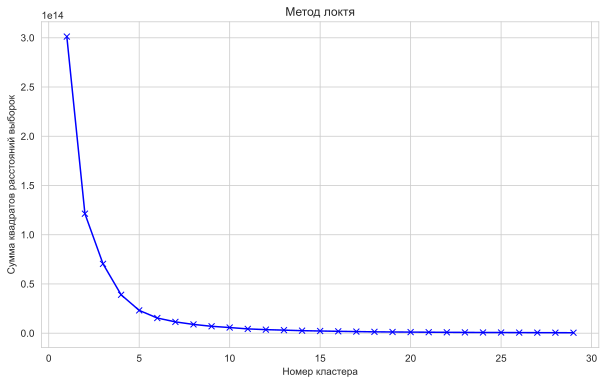

In [52]:
plt.plot(range(1, 30), cs, 'bx-')
plt.title('Метод локтя')
plt.xlabel('Номер кластера')
plt.ylabel('Сумма квадратов расстояний выборок') 
plt.show()

На графике "метода локтя" визуально видим 5 кластеров.

Построим графики распределения от суммы и количества товаров

In [53]:
datas_kmeans = datas_prod.iloc[:,[1,2,3,4,5]].values
print(datas_kmeans)
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(datas_kmeans)

[[7.25000000e+02 5.09232427e+06 1.17379894e+00 1.56398309e+00
  2.61855566e+00]
 [5.80000000e+02 1.82369331e+06 4.20367823e-01 1.25118647e+00
  1.14953307e+01]
 [4.35000000e+02 4.56622985e+06 1.05253229e+00 9.38389852e-01
  3.67108795e+00]
 ...
 [1.00000000e+00 1.06500000e+04 2.45486305e-03 2.15721805e-03
  9.80453836e+01]
 [1.00000000e+00 1.06500000e+04 2.45486305e-03 2.15721805e-03
  9.80429288e+01]
 [1.00000000e+00 5.35000000e+02 1.23319411e-04 2.15721805e-03
  1.00000000e+02]]


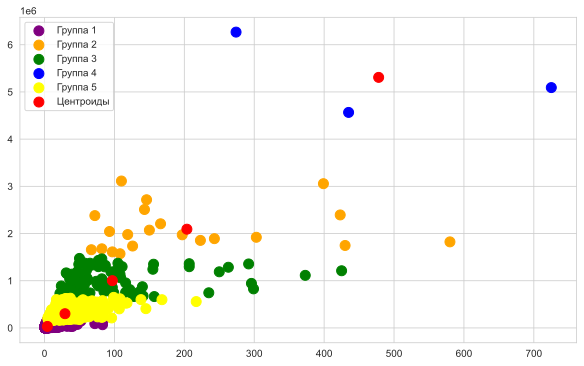

In [ ]:
plt.scatter(datas_kmeans[y_kmeans == 0, 0], datas_kmeans[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Группа 1')
plt.scatter(datas_kmeans[y_kmeans == 1, 0], datas_kmeans[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Группа 2')
plt.scatter(datas_kmeans[y_kmeans == 2, 0], datas_kmeans[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Группа 3')
plt.scatter(datas_kmeans[y_kmeans == 3, 0], datas_kmeans[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'Группа 4')
plt.scatter(datas_kmeans[y_kmeans == 4, 0], datas_kmeans[y_kmeans == 4, 1], s = 100, c = 'yellow', label = 'Группа 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Центроиды')

plt.legend()

Построим графики распределения в "масштабе", используя дополнительные признаки - Сумма продаж и сумма количество

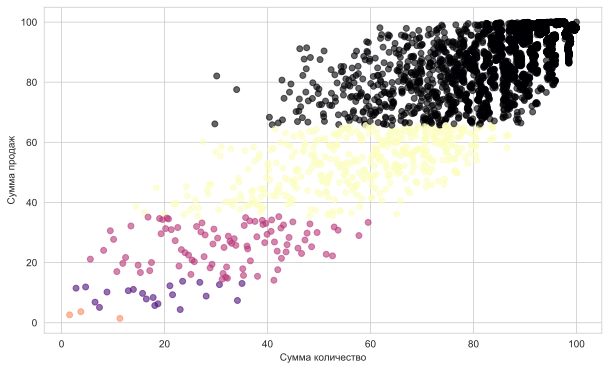

In [ ]:
plt.scatter(datas_prod['Сумма количество'], datas_prod['Сумма продаж'], c = kmeans.labels_, cmap = 'magma', alpha=0.6)
plt.xlabel('Сумма количество')
plt.ylabel('Сумма продаж')
plt.show()

### 7. Важные признаки

Для выявления важных признаков использовать сформируем датафрэйм datas_vajnost. Т.к уже в занятиях использовался приём для выявления важных признаков воспользуемся им, с классом SelectKBest и функцией chi2 из sklearn.

In [ ]:
datas_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46353 entries, 0 to 48302
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Дата         46353 non-null  datetime64[ns]
 1   Транзакция   46353 non-null  int64         
 2   Клиент       46353 non-null  int64         
 3   Товар        46353 non-null  int64         
 4   Сумма        46353 non-null  float64       
 5   ДеньНочь     46353 non-null  int64         
 6   День недели  46353 non-null  int64         
 7   Месяц        46353 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 3.2 MB


In [54]:
datas.head()

,Дата,Транзакция,Клиент,Товар,Количество,Сумма,ДеньНочь,День недели,Месяц
0,2020-03-05 21:43:00,954,1,2874.0,1,8150.0,0,Четверг,Март
1,2020-11-20 20:46:00,13796,1,3586.0,1,3930.0,0,Пятница,Ноябрь
2,2020-08-12 16:28:00,14431,1,4942.0,1,2860.0,1,Среда,Август
3,2020-03-05 21:15:00,951,2,2812.0,1,4895.0,0,Четверг,Март
4,2020-05-20 16:46:00,3352,2,5025.0,1,840.0,1,Среда,Май


In [ ]:
datas_vajnost = datas.replace({
    'Январь': 1,
    'Февраль': 2,
    'Март': 3,
    'Апрель' : 4,
    'Май': 5,
    'Июнь': 6,
    'Июль': 7,	
	'Август': 8,	
	'Cентябрь': 9,
    'Октябрь': 10,
    'Ноябрь':11,
    'Декабрь':12,
    'Понедельник': 1,
    'Вторник': 2,
    'Среда':3,
    'Четверг':4,
    'Пятница':5,
    'Суббота':6,
    'Воскресение':7
})

In [ ]:
datas_vajnost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46353 entries, 0 to 48302
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Дата         46353 non-null  datetime64[ns]
 1   Транзакция   46353 non-null  string        
 2   Клиент       46353 non-null  string        
 3   Товар        46353 non-null  string        
 4   Количество   46353 non-null  int64         
 5   Сумма        46353 non-null  float64       
 6   ДеньНочь     46353 non-null  int64         
 7   День недели  46353 non-null  int64         
 8   Месяц        46353 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), string(3)
memory usage: 3.5 MB


Можно запустить в цикле(закомментированны), но нужны хорошие вычислительные мощности. Определились Важные признаки: Сумма и месяц.

In [ ]:
#Ваш код
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


list_bez_pr = ['Транзакция', 'Клиент','Количество', 'Сумма', 'День недели', 'Месяц', 'ДеньНочь']
# sp = ('Транзакция', 'Клиент', 'Товар','Количество', 'Сумма', 'День недели', 'Месяц', 'ДеньНочь')
# for i in sp:
#     print(i)
#     list_bez_pr = list(sp)
#     list_bez_pr.remove(i)
#     print(list_bez_pr)
#     print('\n')
#     X = datas_vajnost[list_bez_pr]
#     y = datas_vajnost[i]
#     bestfeatures = SelectKBest(score_func = chi2, k = 'all')
#     fit = bestfeatures.fit(X, y)
#     dfscores = pd.DataFrame(fit.scores_)
#     dfcolumns = pd.DataFrame(X.columns)

#     featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
#     featureScores.columns = ['Specs', 'Score']  
#     print(featureScores.nlargest(10, 'Score'))

X = datas_vajnost[list_bez_pr]
y = datas_vajnost['Товар']
bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score'))



         Specs         Score
3        Сумма  2.344888e+08
0   Транзакция  6.438091e+07
1       Клиент  1.951025e+07
5        Месяц  1.087418e+04
4  День недели  5.007341e+03
6     ДеньНочь  3.104212e+03
2   Количество  1.212576e-28


### 8.	Рекомендации

Построим рекомендательную систему. Для начала сгруппируем данные для сводной таблицы.

In [ ]:
#Ваш код
recomm_data = datas[['Товар','Клиент','Количество']].groupby(['Товар','Клиент']).sum().sort_index().reset_index()
for i in recomm_data:
    print(i)
    print(recomm_data[i].nunique())

print(recomm_data.duplicated().sum())


Товар
5183
Клиент
10933
Количество
16
0


In [ ]:
recomm_data.Клиент

0        6902
1        2787
2        3803
3        9652
4        9942
         ... 
40659    6587
40660    6954
40661    7075
40662    8037
40663    9235
Name: Клиент, Length: 40664, dtype: string

In [ ]:
from scipy.sparse import csr_matrix 

redata = recomm_data.pivot(index= 'Клиент',columns='Товар',values='Количество').fillna(0)
recomm_matrix = csr_matrix(redata)

In [ ]:
recomm_matrix

<10933x5183 sparse matrix of type '<class 'numpy.float64'>'
	with 40664 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import NearestNeighbors  

knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(recomm_matrix)

In [ ]:
def most_similar_users_to(user_id):
    most_similar_users_to = []
    distance, indice = model_knn.kneighbors(redata.iloc[user_id,:].values.reshape(1,-1), n_neighbors=10)
    print('Рекомендации для ## {0} ##:'.format(redata.index[user_id]))
    for i in range(1, len(distance.flatten())):
        user_id1 = redata.index[indice.flatten()[i]]
        most_similar_users_to.append((user_id1, distance.flatten()[i]))

    most_similar_users_to.sort(key=lambda x: x[1], reverse=True)

    return most_similar_users_to[:10] 

In [ ]:
print("Подобие (схожесть) на основе пользователя")
print(most_similar_users_to(1))

Подобие (схожесть) на основе пользователя
Рекомендации для ## 10 ##:
[('3409', 0.5285954792089684), ('3517', 0.5285954792089684), ('1752', 0.5285954792089684), ('2027', 0.5285954792089684), ('7119', 0.5285954792089684), ('1369', 0.5184565876569233), ('1000', 0.33333333333333337), ('7280', 0.33333333333333337), ('4449', 0.33333333333333337)]


## Вывод

В проделанной работе, выполнил предварительную обработку данных. Провёл разведочный анализ данных EDA. При исследовании данных появились дополнительные гипотезы о данных, в которых также провёл анализ, но зависимости не нашёл, а может и не правильно искал(. Проделал кластеризацию по товарам, определил важные признаки, и наконец построил коллаборативную рекомендательную систему на основе пользователя.